<a href="https://colab.research.google.com/github/SonuThorave/AS/blob/main/ASSIGNMENT1DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=load_wine()

In [3]:
df=pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
df['Wine Quality']=dataset["target"]
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine Quality
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
dataset["target_names"]

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [12]:
df[ 'wine name' ]=df[ 'Wine Quality' ].replace(to_replace=[0,1,2],value=dataset[ 'target_names' ])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine Quality,wine name
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [13]:
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine Quality,wine name
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2,class_2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2,class_2


In [14]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,0:13]
Y=df.iloc[:,14:15]
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.30,random_state=1)

xtest.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
161,13.69,3.26,2.54,20.0,107.0,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680.0
117,12.42,1.61,2.19,22.5,108.0,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345.0
19,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0
69,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0
53,13.77,1.90,2.68,17.1,115.0,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375.0


In [15]:
print("Xtest shape",xtest.shape)
print("Xtrain shape",xtrain.shape)
print("Ytrain shape",ytrain.shape)

Xtest shape (54, 13)
Xtrain shape (124, 13)
Ytrain shape (124, 1)


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
xtrain_transform=scaler.fit_transform(xtrain)
xtest_transform=scaler.fit_transform(xtest)

xtrain_transform[0:10]

array([[0.27631579, 0.18979592, 0.40522876, 0.42196532, 0.11956522,
        0.2137931 , 0.24472574, 0.78      , 0.38801262, 0.09556314,
        0.45217391, 0.36630037, 0.16396104],
       [0.37894737, 0.12653061, 0.32679739, 0.45086705, 1.        ,
        0.52413793, 0.407173  , 0.38      , 0.90536278, 0.11262799,
        0.52173913, 0.4981685 , 0.5349026 ],
       [0.74736842, 0.20408163, 0.71895425, 0.47398844, 0.40217391,
        0.67931034, 0.55485232, 0.48      , 0.42586751, 0.27474403,
        0.6       , 0.78021978, 0.51704545],
       [0.22105263, 0.69591837, 0.45098039, 0.56647399, 0.13043478,
        0.64827586, 0.56751055, 0.16      , 0.78864353, 0.12969283,
        0.16521739, 0.86813187, 0.08279221],
       [0.41315789, 0.31836735, 0.32679739, 0.42196532, 0.26086957,
        0.22068966, 0.06751055, 1.        , 0.16719243, 0.49658703,
        0.14782609, 0.11355311, 0.33847403],
       [0.54736842, 0.02244898, 0.        , 0.21965318, 0.08695652,
        0.68965517, 0.59915

In [17]:
from sklearn.neural_network import MLPClassifier

xtest_transform[0:10]

array([[0.76767677, 0.65116279, 0.75641026, 0.48453608, 0.34328358,
        0.25943396, 0.02601156, 0.69230769, 0.1496063 , 0.40102041,
        0.57831325, 0.23043478, 0.26900585],
       [0.34006734, 0.2248062 , 0.53205128, 0.61340206, 0.35820896,
        0.33962264, 0.46820809, 0.38461538, 0.46850394, 0.01122449,
        0.69879518, 0.72608696, 0.02412281],
       [0.75084175, 0.60981912, 0.76923077, 0.2371134 , 0.47761194,
        0.66981132, 0.73988439, 0.05769231, 0.48818898, 0.32142857,
        0.57831325, 0.9       , 0.38961988],
       [0.26936027, 0.11627907, 0.25      , 0.31958763, 1.        ,
        0.26886792, 0.23410405, 0.        , 0.81889764, 0.09183673,
        0.96385542, 0.77391304, 0.29678363],
       [0.79461279, 0.2997416 , 0.84615385, 0.33505155, 0.46268657,
        0.81132075, 0.67052023, 0.48076923, 0.49606299, 0.44387755,
        0.78313253, 0.71304348, 0.77704678],
       [0.7003367 , 0.73643411, 0.53205128, 0.45876289, 0.05970149,
        0.16037736, 0.00289

In [18]:
model=MLPClassifier(hidden_layer_sizes=(300,200,100),activation='tanh',max_iter=300,solver='adam')

model.fit(xtrain_transform,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='tanh', hidden_layer_sizes=(300, 200, 100),
              max_iter=300)

In [19]:
ypred=model.predict(xtest_transform)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(ytest,ypred)
print("accuracy is",accuracy)

accuracy is 1.0


In [21]:
cm=confusion_matrix(ytest,ypred)
cm

array([[23,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 12]])

In [22]:
from sklearn.metrics import classification_report
cr=classification_report(ytest,ypred)

print(cr)

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        23
     class_1       1.00      1.00      1.00        19
     class_2       1.00      1.00      1.00        12

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



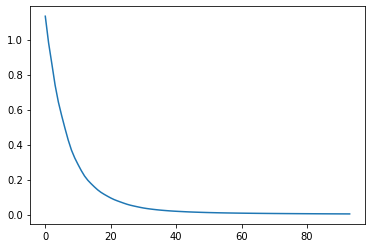

In [23]:
plt.plot(model.loss_curve_)